### 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Importing data frame

In [2]:
ords_prods_cust = pd.read_pickle(r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_cust_merged_1.pkl')

In [3]:
ords_prods_cust.shape

(30356128, 32)

In [4]:
ords_prods_cust.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [5]:
ords_prods_cust.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending',
       'spending_flag', 'frequency', 'frequency_flag', 'first_name', 'surname',
       'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'family_status', 'income'],
      dtype='object')

In [6]:
# Identifying prices higher than 100
ords_prods_cust.loc[ords_prods_cust['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
21681,33664,2 % Reduced Fat Milk,84,16,99999.0,1489110,43360,3,1,10,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
21682,33664,2 % Reduced Fat Milk,84,16,99999.0,2322035,43360,4,1,10,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
21683,33664,2 % Reduced Fat Milk,84,16,99999.0,420339,43360,5,1,10,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
21684,33664,2 % Reduced Fat Milk,84,16,99999.0,2912515,43360,7,2,9,...,Frequent customer,Marilyn,Baker,Female,Florida,67,7/16/2017,3,married,149199
27078,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,518829,54136,22,1,9,...,Regular customer,Benjamin,Parsons,Male,New Jersey,40,1/28/2020,0,single,160524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30331638,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,285306,136909,4,1,17,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,5/14/2017,2,married,161606
30331639,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2744314,136909,13,6,12,...,Frequent customer,Deborah,Dillon,Female,New Jersey,30,5/14/2017,2,married,161606
30346298,33664,2 % Reduced Fat Milk,84,16,99999.0,2235868,35869,4,0,21,...,Non-frequent customer,Theresa,Stein,Female,Iowa,32,2/16/2017,1,married,105422
30346332,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,2716179,2700,7,2,7,...,Frequent customer,Charles,Crosby,Male,Washington,67,4/19/2019,0,divorced/widowed,225873


In [7]:
# Assigning missing values to 4776 rows for which the prices are greater than 100 to get rid of outliers
ords_prods_cust.loc[ords_prods_cust['prices'] > 100, 'prices'] = np.nan

In [8]:
# Checking for the "new" maximum value for prices in the dataset
ords_prods_cust['prices'].max()

25.0

### 03. Exploring whether there is a connection between age and spending power

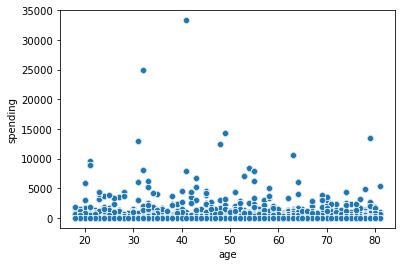

In [9]:
# Creating a scatterplot to visualize the relationship between age and spending power
scatterplot1 = sns.scatterplot(x = 'age', y = 'spending', data = ords_prods_cust)

Customers between 30 and 40 are the biggest spenders.

In [10]:
# Exporting the scatterplot
# Creating a path
path = r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis'

In [11]:
path

'C:\\Users\\veren\\Python Data\\26-10-2021 Instacart Basket Analysis'

In [12]:
# Exporting the scatterplot
scatterplot1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_4.9_spending_power.png'))